# Dataset overview

This is a dataset about customers' profiles and their behaviours on purchasing and marketing campaigns from iFood, a Brazilian online food company. The ultimate goal here is trying to develop a model to predict customer's behavior that whether a customer would accept marketing campaign based on patterns/traits. 

I randomly found this dataset in kaggle.com (https://www.kaggle.com/datasets/jackdaoud/marketing-data)

Dataset terminologies are listed under below image:

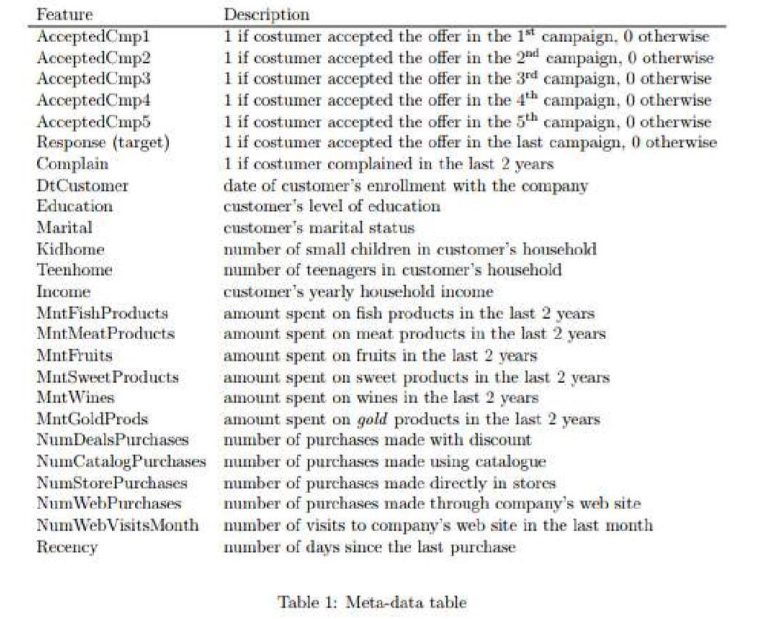

## 1. import libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
original_df = pd.read_csv('raw_data.csv')

In [4]:
original_df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
original_df.shape

(2240, 29)

In [6]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)

In [8]:
original_df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

## 2. Data cleansing

### a) remove duplicates

In [9]:
original_df.shape

(2240, 29)

In [10]:
original_df.drop_duplicates(inplace=True)
original_df.shape

(2240, 29)

### b) remove null values

In [11]:
original_df[original_df.isnull().any(axis=1)]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
10    2013-11-15       11         5          5                6   
27    2013-02-20       19         5          1                3   
43    2013-11-05       80        81         11               50   
48    2014-01-01       96        48          5               48   
58    2013-06-17       57        11          3               22   
71    2012-09-14       25        25          3               43   
90    2012-11-19        4       230         42              192   
91    2014-05-27       45         7          0                8   
92    2013-11-23       87       445         37              359   
128   2013-07-11       23       352          0               27   
133   2013-08-11       96       231         65              196   
312   2013-06-03       69       861        138              461   
319   2013-08-23       67       738         20              172   
1379  2013-04-01       39       187          5               65   
1382  2012-09-03       87        19          4               12   
1383  2014-01-12       49         5          1                9   
1386  2014-03-02       17        25          1               13   
2059  2013-05-18       52       375         42               48   
2061  2013-05-31       82        23          0               15   
2078  2013-03-03       82        71          1               16   
2079  2013-06-23       83       161          0               22   
2081  2013-10-18       95       264          0               21   
2084  2013-10-30       75       532        126              490   
2228  2012-08-12       53        32          2             1607   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
10                  0                 2             1                  1   
27                  3               263           362                  0   
43                  3                 2            39                  1   
48 

In [12]:
len(original_df[original_df.isnull().any(axis=1)])/len(original_df)

0.010714285714285714

In [13]:
cleaned_df = original_df.dropna()
cleaned_df.shape

(2216, 29)

### c) remove unnecessary columns 
Since cost of contact and revenue are same across all data and not relevant to this analysis, I will remove these columns 

In [14]:
cleaned_df.drop(columns =['Z_CostContact','Z_Revenue'],inplace=True)
cleaned_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

### d) format change 
From dataset info, I find out that the type of 'Dt_customer' column is an object but it should be datetime instead. Therefore, I will convert this column data type to be datetime. 

In [15]:
cleaned_df['Dt_Customer'] = pd.to_datetime(cleaned_df['Dt_Customer'])

In [16]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

### e) Extract features from original data
we can get customer's age from 'Year_Birth' column. In addition, we can get a data that how many days the customer has been with company from 'Dt_customer' column.

In [17]:
cleaned_df['age']= pd.to_datetime("today").year - cleaned_df['Year_Birth']

In [18]:
cleaned_df.head(3)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   

   age  
0   65  
1   68  
2   57

In [19]:
cleaned_df['Customer_Days']= (pd.to_datetime("today") - cleaned_df['Dt_Customer']).dt.days

In [20]:
cleaned_df.head(3)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   

   age  Customer_Days  
0   65           3598  
1   68           3048  
2   57           3247

We can also make a grand total column for number of campaign offers accepted by adding 'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'. I will call it as 'AcceptedCmpOverall'


In [21]:
cleaned_df['AcceptedCmpOverall'] = cleaned_df['AcceptedCmp1']+cleaned_df['AcceptedCmp2']+cleaned_df['AcceptedCmp3']+cleaned_df['AcceptedCmp4']+cleaned_df['AcceptedCmp5']

I will also make a total column for number of dependents by adding 'Kidhome' and 'Teenhome'

In [22]:
cleaned_df['dependent'] = cleaned_df['Kidhome']+cleaned_df['Teenhome']
cleaned_df.head(3)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   

   age  Customer_Days  AcceptedCmpOverall  dependent  
0   65           3598                   0          0  
1   68           3048                   0          2  
2   57           3247                   0          0

### f) Remove outliers 

In [23]:
cleaned_df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   174.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2216.000000       2216.000000   2216.000000        2216.000000   
mean         37.637635         27.028881     43.965253           2.323556   
std          54.752082         41.072046     51.815414           1.923716   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.500000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        262.000000    321.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2216.000000          2216.000000        2216.000000   
mean          4.085289             2.671029           5.800993   
std           2.740951             2.926734           3.250785   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2216.000000   2216.000000   2216.000000   2216.000000   
mean            5.319043      0.073556      0.074007      0.073105   
std             2.425359      0.261106      0.261842      0.260367   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain     Response          age  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2216.000000   
mean       0.064079      0.013538     0.009477     0.150271    53.179603   
std        0.244950      0.115588     0.096907     0.357417    11.985554   
min        0.000000      0.000000     0.000000     0.000000    26.000000   
25%        0.000000      0.000000     0.000000     0.000000    45.000000   
50%        0.000000      0.000000     0.000000     0.000000    52.000000   
75%        0.000000      0.000000     0.000000     0.000000    63.000000   
max        1.000000      1.000000     1.000000     1.000000   129.000000   

       Customer_Days  AcceptedCmpOverall    dependent  
count    2216.000000         2216.000000  2216.000000  
mean     3288.521209

From this table, max of income is extremely higher than the mean of income data. Let's see if this is an outlier by plotting a graph. 

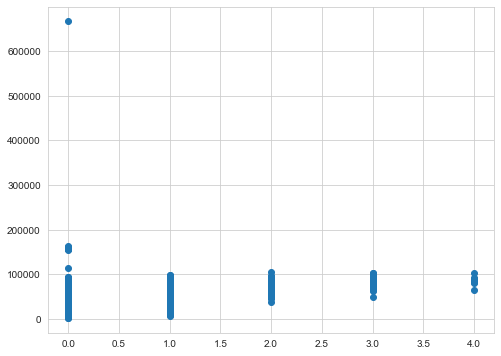

In [24]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.figure()
plt.scatter(cleaned_df['AcceptedCmpOverall'], cleaned_df['Income'])
plt.show()

In [25]:
cleaned_df[cleaned_df['Income']>100000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
124    7215        1983  Graduation         Single  101970.0        0   
164    8475        1973         PhD        Married  157243.0        0   
203    2798        1977         PhD       Together  102160.0        0   
252   10089        1974  Graduation       Divorced  102692.0        0   
617    1503        1976         PhD       Together  162397.0        1   
646    4611        1970  Graduation       Together  105471.0        0   
655    5555        1975  Graduation       Divorced  153924.0        0   
687    1501        1982         PhD        Married  160803.0        0   
1300   5336        1971      Master       Together  157733.0        1   
1653   4931        1977  Graduation       Together  157146.0        0   
1898   4619        1945         PhD         Single  113734.0        0   
2132  11181        1949         PhD        Married  156924.0        0   
2233   9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
124          0  2013-03-12       69       722         27              102   
164          1  2014-03-01       98        20          2             1582   
203          0  2012-11-02       54       763         29              138   
252          0  2013-04-05        5       168        148              444   
617          1  2013-06-03       31        85          1               16   
646          0  2013-01-21       36      1009        181              104   
655          0  2014-02-07       81         1          1                1   
687          0  2012-08-04       21        55         16             1622   
1300         0  2013-06-04       37        39          1                9   
1653         0  2013-04-29       13         1          0             1725   
1898         0  2014-05-28        9         6          2                3   
2132         0  2013-08-29       85         2          1                2   
2233         0  2013-06-02       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
124                44                72           168                  0   
164                 1                 2             1                 15   
203                76               176            58                  0   
252                32               172           148                  1   
617                 2                 1             2                  0   
646               202                21           207                  0   
655                 1                 1             1                  0   
687                17                 3             4                 15   
1300                2                 0             8                  0   
1653                2                 1             1                  0   
1898                1               262             3                  0   
2132                1                 1             1                  0   
2233                8                 1            12                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
124                 6                    8                 13   
164                 0                   22                  0   
203                 7                    9                 10   
252                 6                    9                 13   
617                 0                    0                  1   
646                 9                    8                 13   
655                 0                    0                  0   
687                 0                   28                  1   
1300                1                    0                  1   
1653                0                   28                  0   
1898               27                    0                  0   
2132                0                    0                  0 

In [26]:
cleaned_df = cleaned_df.drop((cleaned_df[cleaned_df['Income']>200000]).index)
cleaned_df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2215.000000  2215.000000    2215.000000  2215.000000  2215.000000   
mean    5586.618059  1968.816704   51969.861400     0.441535     0.505643   
std     3249.082838    11.987000   21526.320095     0.536886     0.544198   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.500000  1959.000000   35284.000000     0.000000     0.000000   
50%     5455.000000  1970.000000   51373.000000     0.000000     0.000000   
75%     8419.000000  1977.000000   68487.000000     1.000000     1.000000   
max    11191.000000  1996.000000  162397.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2215.000000  2215.000000  2215.000000      2215.000000   
mean     49.024379   305.225282    26.361625       167.063205   
std      28.949608   337.345380    39.802036       224.311559   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   175.000000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.500000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2215.000000       2215.000000   2215.000000        2215.000000   
mean         37.651016         27.040632     43.979684           2.322799   
std          54.760822         41.077594     51.822660           1.923820   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     25.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        262.000000    321.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2215.000000          2215.000000        2215.000000   
mean          4.085779             2.671783           5.802257   
std           2.741473             2.927179           3.250974   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2215.000000   2215.000000   2215.000000   2215.000000   
mean            5.318736      0.073589      0.074041      0.073138   
std             2.425863      0.261160      0.261896      0.260421   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain     Response          age  \
count   2215.000000   2215.000000  2215.000000  2215.000000  2215.000000   
mean       0.064108      0.013544     0.009481     0.150339    53.183296   
std        0.245001      0.115614     0.096929     0.357484    11.987000   
min        0.000000      0.000000     0.000000     0.000000    26.000000   
25%        0.000000      0.000000     0.000000     0.000000    45.000000   
50%        0.000000      0.000000     0.000000     0.000000    52.000000   
75%        0.000000      0.000000     0.000000     0.000000    63.000000   
max        1.000000      1.000000     1.000000     1.000000   129.000000   

       Customer_Days  AcceptedCmpOverall    dependent  
count    2215.000000         2215.000000  2215.000000  
mean     3288.503837

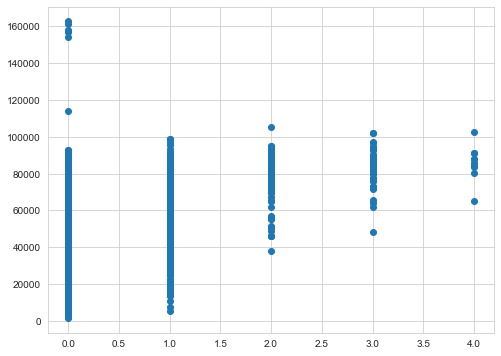

In [27]:
plt.figure()
plt.scatter(cleaned_df['AcceptedCmpOverall'], cleaned_df['Income'])
plt.show()

In [28]:
cleaned_df.sort_values('Income').tail(10)

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
252   10089        1974  Graduation       Divorced  102692.0        0   
646    4611        1970  Graduation       Together  105471.0        0   
1898   4619        1945         PhD         Single  113734.0        0   
655    5555        1975  Graduation       Divorced  153924.0        0   
2132  11181        1949         PhD        Married  156924.0        0   
1653   4931        1977  Graduation       Together  157146.0        0   
164    8475        1973         PhD        Married  157243.0        0   
1300   5336        1971      Master       Together  157733.0        1   
687    1501        1982         PhD        Married  160803.0        0   
617    1503        1976         PhD       Together  162397.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
252          0  2013-04-05        5       168        148              444   
646          0  2013-01-21       36      1009        181              104   
1898         0  2014-05-28        9         6          2                3   
655          0  2014-02-07       81         1          1                1   
2132         0  2013-08-29       85         2          1                2   
1653         0  2013-04-29       13         1          0             1725   
164          1  2014-03-01       98        20          2             1582   
1300         0  2013-06-04       37        39          1                9   
687          0  2012-08-04       21        55         16             1622   
617          1  2013-06-03       31        85          1               16   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
252                32               172           148                  1   
646               202                21           207                  0   
1898                1               262             3                  0   
655                 1                 1             1                  0   
2132                1                 1             1                  0   
1653                2                 1             1                  0   
164                 1                 2             1                 15   
1300                2                 0             8                  0   
687                17                 3             4                 15   
617                 2                 1             2                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
252                 6                    9                 13   
646                 9                    8                 13   
1898               27                    0                  0   
655                 0                    0                  0   
2132                0                    0                  0   
1653                0                   28                  0   
164                 0                   22                  0   
1300                1                    0                  1   
687                 0                   28                  1   
617                 0                    0                  1   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
252                   2             0             1             1   
646                   3             0             0             1   
1898                  1             0             0             0   
655                   0             0             0             0   
2132                  0             0             0             0   
1653                  1             0             0             0   
164                   0             0             0             0   
1300                  1             0             0             0   
687                   0             0             0             0   
617                   1             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  

Another thing to check is age. 

In [29]:
cleaned_df[cleaned_df['age']>80]['age']

192     122
239     129
339     123
424      81
1950     82
Name: age, dtype: int64

After age of '82' there is a big jump (+40years old). I googled oldest person alive and so far it is 118 years. The 3 values that indicate age over 120 are definately outliers. These need to be cleaned. 

In [30]:
cleaned_df = cleaned_df.drop((cleaned_df[cleaned_df['age']>120]).index)

In [31]:
cleaned_df[cleaned_df['age']>80]['age']

424     81
1950    82
Name: age, dtype: int64

## 3. Data distribution
### a) customer distribution by education level

In [32]:
education_counts = cleaned_df.groupby('Education')['Income'].agg(len)
education_counts

Education
2n Cycle       198
Basic           54
Graduation    1115
Master         365
PhD            480
Name: Income, dtype: int64

I found that 2n Cycle is basically same as Master's degree in US. I will make a copy to update '2n Cycle' to be 'Master'

In [33]:
updated_df = cleaned_df.copy()

In [34]:
updated_df.loc[updated_df['Education'] == '2n Cycle', 'Education'] = 'Master'

In [35]:
education_counts = updated_df.groupby('Education')['Income'].agg(len)
education_counts

Education
Basic           54
Graduation    1115
Master         563
PhD            480
Name: Income, dtype: int64

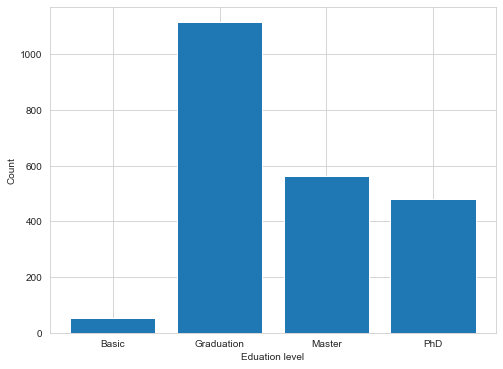

In [36]:
plt.figure()
plt.bar(education_counts.index, education_counts)
plt.xlabel('Eduation level')
plt.ylabel('Count')
plt.show()

Majority of customers are highly educated 

### b) Customer distribution by marital status

In [37]:
marital_counts = updated_df.groupby('Marital_Status')['AcceptedCmpOverall'].agg(len)
marital_counts

Marital_Status
Absurd        2
Alone         3
Divorced    231
Married     857
Single      470
Together    571
Widow        76
YOLO          2
Name: AcceptedCmpOverall, dtype: int64

Again, I need to aggregate some of categories into a single category. "Absurd","Alone" and "YOLO" categories only have 2-3 values and it is not reasonable to leave as it is, so I will add them into "Single" category which seems most appropriate. 

In [38]:
updated_df.loc[updated_df['Marital_Status'] == 'Absurd', 'Marital_Status'] = 'Single'
updated_df.loc[updated_df['Marital_Status'] == 'Alone', 'Marital_Status'] = 'Single'
updated_df.loc[updated_df['Marital_Status'] == 'YOLO', 'Marital_Status'] = 'Single'
marital_counts = updated_df.groupby('Marital_Status')['AcceptedCmpOverall'].agg(len)

In [39]:
marital_counts

Marital_Status
Divorced    231
Married     857
Single      477
Together    571
Widow        76
Name: AcceptedCmpOverall, dtype: int64

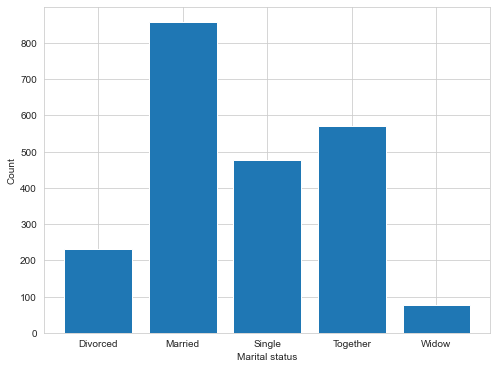

In [40]:
plt.figure()
plt.bar(marital_counts.index, marital_counts)
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.show()

More of married - together customers base than single status customers

### c) Customer distribution by age

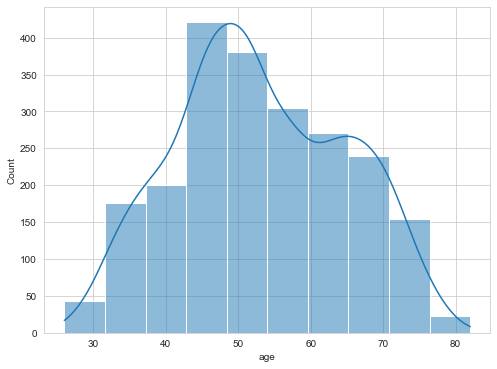

In [41]:
sns.histplot(cleaned_df['age'], kde = True, bins =10)
plt.show()

Castomer base is mostly in middle age (between age of 40-60)

### d) Overall Campaign accepted 

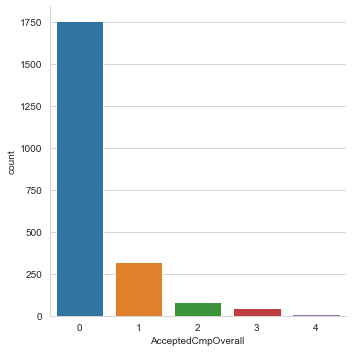

In [42]:
sns.catplot(data=updated_df, x ='AcceptedCmpOverall', kind='count',
           order = [0,1,2,3,4])
plt.show()

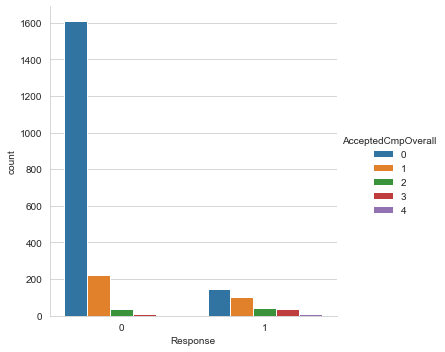

In [43]:
sns.catplot(data=cleaned_df, x ='Response', kind='count',hue = 'AcceptedCmpOverall')
plt.show()

The customers who have not accepted all of previous campaigns highly likely not accept last campaign.

**Which campaign was most successful?**

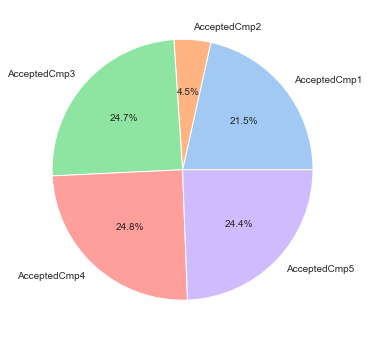

In [44]:
plt.pie(cleaned_df[['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(),
        labels=cleaned_df[['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].columns,
        colors = sns.color_palette('pastel'),
       autopct='%.1f%%')
plt.show()

**what products sold the most?**

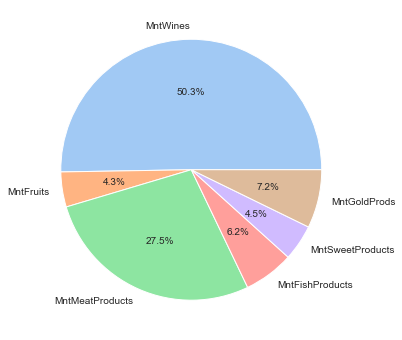

In [45]:
plt.pie(cleaned_df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum(),
        labels=cleaned_df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].columns,
        colors = sns.color_palette('pastel'),
       autopct='%.1f%%')
plt.show()

## 4. Trend analysis

**Any trend with average total amount spent on products?**

In [46]:
spend_summary = cleaned_df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','AcceptedCmpOverall']].groupby('AcceptedCmpOverall').agg(np.mean)
spend_summary.index.names = [None]
spend_summary.rename(index={0:'Not accepted offer',
                            1:'Accepted one offer',
                            2:'Accepted two offers',
                            3:'Accepted three offers',
                            4:'Accepted four offers'},
                    inplace=True)

In [47]:
spend_summary['total amount spent on products'] = spend_summary.sum(axis=1)

In [48]:
spend_summary

MntWines  MntFruits  MntMeatProducts  \
Not accepted offer     225.307868  23.782782       135.818700   
Accepted one offer     502.316770  30.729814       241.658385   
Accepted two offers    828.469136  43.604938       352.259259   
Accepted three offers  927.727273  60.750000       477.113636   
Accepted four offers   948.545455  38.727273       354.909091   

                       MntFishProducts  MntSweetProducts  MntGoldProds  \
Not accepted offer           33.160775         23.697834     38.909350   
Accepted one offer           48.338509         32.723602     58.512422   
Accepted two offers          67.444444         50.172840     67.987654   
Accepted three offers        80.863636         69.386364     89.795455   
Accepted four offers         48.090909         55.181818     56.181818   

                       total amount spent on products  
Not accepted offer                         480.677309  
Accepted one offer                         914.279503  
Accepted two offers                       1409.938272  
Accepted three offers                     1705.636364  
Accepted four offers                      1501.636364

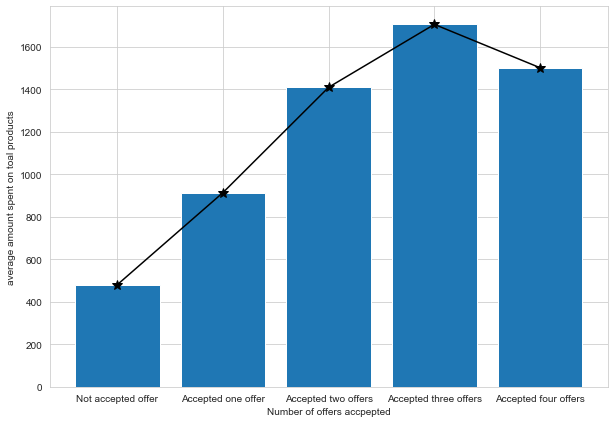

In [49]:
fig = plt.figure(figsize =(10, 7))
plt.bar(spend_summary.index,spend_summary['total amount spent on products'])
spend_summary['total amount spent on products'].plot(kind='line', marker='*', color='black', ms=10)
plt.xlabel('Number of offers accpepted')
plt.ylabel('average amount spent on toal products');

It seems like there is a **positive relationship** between number of offers accepted and average amount spending on total products. As average amount spending on total products increased, number of offers accepted also increased. 

In [50]:
spend_response = cleaned_df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Response']]
spend_response = spend_response.groupby('Response').agg(np.mean)
spend_response.index.names = [None]
spend_response['total amount spent on products'] = spend_response.sum(axis=1)

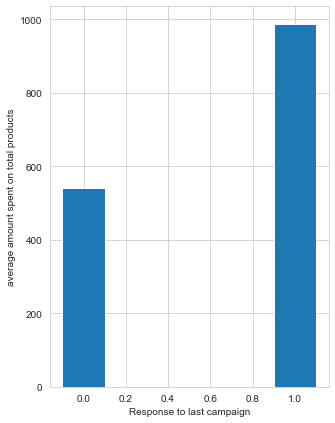

In [51]:
fig = plt.figure(figsize =(5, 7))
plt.bar(spend_response.index,spend_response['total amount spent on products'],width=0.2)
plt.xlabel('Response to last campaign')
plt.ylabel('average amount spent on total products');

Average amount spent on total products was higher for the customers who accepted last campaign compare to who did not accepted last campaign

**Any trend with method of purchase?**

In [52]:
method_summary = cleaned_df[['NumDealsPurchases', 'NumWebPurchases',
                          'NumCatalogPurchases', 'NumStorePurchases',
                          'AcceptedCmpOverall']].groupby('AcceptedCmpOverall').agg(np.mean)
method_summary.index.names = [None]

method_summary

NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases
0           2.410490         3.790764             2.202965           5.496009
1           2.242236         5.090062             3.866460           6.577640
2           1.666667         5.580247             5.469136           7.962963
3           1.113636         5.613636             6.431818           7.954545
4           0.727273         5.090909             6.909091           8.272727

<Figure size 720x504 with 0 Axes>

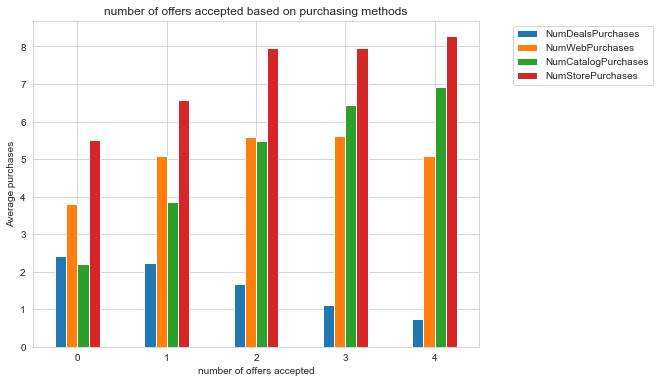

In [53]:
fig = plt.figure(figsize =(10, 7))
method_summary.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("number of offers accepted")
plt.ylabel("Average purchases")
plt.title("number of offers accepted based on purchasing methods")
plt.legend(bbox_to_anchor=(1.4, 1),loc='upper right');

Graph shows:
- negative relationship between average purchases made with discount and number of offers accepted 
- positive relationship between average purchases made with other methods (purchase in store, purchase through website, purchase using catalog) and number of offers accepted

It is highly likley that the customer would not accept last campaign offers if the customer did not accept previous offers 

In [54]:
education_pivot = updated_df.pivot_table(
    values='Income',
    index='AcceptedCmpOverall',
    columns='Education',
    aggfunc=[np.mean]).droplevel(level=0, axis=1)
education_pivot

Education                  Basic    Graduation        Master           PhD
AcceptedCmpOverall                                                        
0                   20295.479167  48508.228861  47208.750000  53745.970027
1                   20392.500000  60133.364780  61980.444444  58399.565789
2                            NaN  77790.828571  76890.300000  72110.576923
3                            NaN  83638.730769  84107.444444  79447.333333
4                            NaN  85497.625000  91172.000000  84662.500000

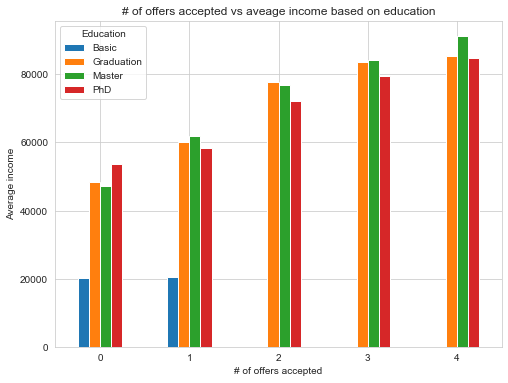

In [55]:
education_pivot.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('# of offers accepted')
plt.ylabel('Average income')
plt.title('# of offers accepted vs aveage income based on education')
plt.show()


-  Customer with lower level of education likely not accept the offer 
-  customers with lower income not likely to accept the offer

In [56]:
marital_pivot = updated_df.pivot_table(
    index='AcceptedCmpOverall',
    columns='Marital_Status',
    aggfunc='count',fill_value=0)
marital_pivot.columns = marital_pivot.columns.to_flat_index()
marital_pivot = marital_pivot.iloc[:,0:5]
marital_pivot.set_axis(['Divorced', 'Married', 'Single', 'Together', 'Widow'], axis=1, inplace=True)
marital_pivot


Divorced  Married  Single  Together  Widow
AcceptedCmpOverall                                            
0                        185      676     378       457     58
1                         34      124      70        82     12
2                          4       37      21        16      3
3                          6       18       5        12      3
4                          2        2       3         4      0

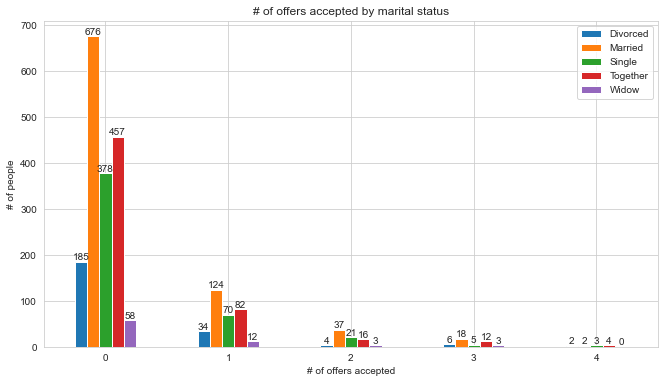

In [57]:
ax = marital_pivot.plot(kind='bar',figsize=(11, 6))

plt.xticks(rotation=0)
plt.xlabel('# of offers accepted')
plt.ylabel('# of people')
plt.title('# of offers accepted by marital status')

for container in ax.containers:
    ax.bar_label(container)
plt.show()

very high % of married customers did not accept any offers

## 5. Correlation

In [58]:
corr_df =updated_df.corr()
corr_df

ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.005086  0.000905  0.000971 -0.003508   
Year_Birth           0.005086    1.000000 -0.199977  0.237497 -0.361932   
Income               0.000905   -0.199977  1.000000 -0.514523  0.034565   
Kidhome              0.000971    0.237497 -0.514523  1.000000 -0.039066   
Teenhome            -0.003508   -0.361932  0.034565 -0.039066  1.000000   
Recency             -0.044147   -0.015694  0.007965  0.010623  0.014392   
MntWines            -0.018906   -0.164615  0.688209 -0.497203  0.003945   
MntFruits            0.010008   -0.013447  0.507354 -0.373258 -0.175905   
MntMeatProducts     -0.003706   -0.033622  0.692279 -0.439031 -0.261134   
MntFishProducts     -0.022405   -0.041154  0.520040 -0.388643 -0.205235   
MntSweetProducts    -0.004381   -0.021516  0.523599 -0.377843 -0.163107   
MntGoldProds        -0.008013   -0.059779  0.388299 -0.354922 -0.018579   
NumDealsPurchases   -0.040849   -0.066156 -0.108207  0.216594  0.386805   
NumWebPurchases     -0.017232   -0.162265  0.459265 -0.372327  0.162239   
NumCatalogPurchases -0.000404   -0.125856  0.696589 -0.504598 -0.112477   
NumStorePurchases   -0.011733   -0.138998  0.631424 -0.501863  0.049212   
NumWebVisitsMonth   -0.008610    0.120282 -0.650257  0.447258  0.130985   
AcceptedCmp3        -0.035668    0.061097 -0.015152  0.016135 -0.042797   
AcceptedCmp4        -0.023692   -0.070035  0.219633 -0.162111  0.038168   
AcceptedCmp5        -0.004441    0.019025  0.395569 -0.204582 -0.190119   
AcceptedCmp1        -0.017989   -0.011941  0.327524 -0.174261 -0.145198   
AcceptedCmp2        -0.014901   -0.007821  0.104036 -0.081911 -0.015633   
Complain             0.031839   -0.004602 -0.027900  0.037067  0.007746   
Response            -0.021112    0.020937  0.161387 -0.077901 -0.154402   
age                 -0.005086   -1.000000  0.199977 -0.237497  0.361932   
Customer_Days       -0.001241    0.014216 -0.023760 -0.055281  0.018557   
AcceptedCmpOverall  -0.033576   -0.001878  0.365986 -0.211343 -0.129475   
dependent           -0.001852   -0.092676 -0.343529  0.688081  0.698199   

                      Recency  MntWines  MntFruits  MntMeatProducts  \
ID                  -0.044147 -0.018906   0.010008        -0.003706   
Year_Birth          -0.015694 -0.164615  -0.013447        -0.033622   
Income               0.007965  0.688209   0.507354         0.692279   
Kidhome              0.010623 -0.497203  -0.373258        -0.439031   
Teenhome             0.014392  0.003945  -0.175905        -0.261134   
Recency              1.000000  0.015981  -0.005257         0.022914   
MntWines             0.015981  1.000000   0.385844         0.568081   
MntFruits           -0.005257  0.385844   1.000000         0.546740   
MntMeatProducts      0.022914  0.568081   0.546740         1.000000   
MntFishProducts      0.000788  0.396915   0.593038         0.572986   
MntSweetProducts     0.025244  0.389583   0.571474         0.534624   
MntGoldProds         0.018148  0.391461   0.393459         0.357556   
NumDealsPurchases    0.002591  0.009117  -0.134191        -0.121128   
NumWebPurchases     -0.005680  0.553663   0.302301         0.306841   
NumCatalogPurchases  0.024197  0.634237   0.485611         0.733787   
NumStorePurchases   -0.000460  0.640219   0.459875         0.486349   
NumWebVisitsMonth   -0.018965 -0.321616  -0.417741        -0.539194   
AcceptedCmp3        -0.032361  0.061360   0.014644         0.018416   
AcceptedCmp4         0.017520  0.373349   0.006598         0.091677   
AcceptedCmp5         0.000233  0.472889   0.208990         0.375252   
AcceptedCmp1        -0.021147  0.351610   0.192417         0.313379   
AcceptedCmp2        -0.001429  0.206309  -0.009924         0.043549   
Complain             0.005713 -0.036420  -0.002956        -0.021017   
Response            -0.200114  0.246320   0.123007         0.237966   
age                  0.015694  0.164615   0.013447         0.033622   
Custo

In [59]:
corr_df[(abs(corr_df)>0.5)&(abs(corr_df)!=1)].dropna(how='all')

ID  Year_Birth    Income   Kidhome  Teenhome  Recency  \
Year_Birth          NaN         NaN       NaN       NaN       NaN      NaN   
Income              NaN         NaN       NaN -0.514523       NaN      NaN   
Kidhome             NaN         NaN -0.514523       NaN       NaN      NaN   
Teenhome            NaN         NaN       NaN       NaN       NaN      NaN   
MntWines            NaN         NaN  0.688209       NaN       NaN      NaN   
MntFruits           NaN         NaN  0.507354       NaN       NaN      NaN   
MntMeatProducts     NaN         NaN  0.692279       NaN       NaN      NaN   
MntFishProducts     NaN         NaN  0.520040       NaN       NaN      NaN   
MntSweetProducts    NaN         NaN  0.523599       NaN       NaN      NaN   
NumWebPurchases     NaN         NaN       NaN       NaN       NaN      NaN   
NumCatalogPurchases NaN         NaN  0.696589 -0.504598       NaN      NaN   
NumStorePurchases   NaN         NaN  0.631424 -0.501863       NaN      NaN   
NumWebVisitsMonth   NaN         NaN -0.650257       NaN       NaN      NaN   
AcceptedCmp4        NaN         NaN       NaN       NaN       NaN      NaN   
AcceptedCmp5        NaN         NaN       NaN       NaN       NaN      NaN   
AcceptedCmp1        NaN         NaN       NaN       NaN       NaN      NaN   
age                 NaN        -1.0       NaN       NaN       NaN      NaN   
AcceptedCmpOverall  NaN         NaN       NaN       NaN       NaN      NaN   
dependent           NaN         NaN       NaN  0.688081  0.698199      NaN   

                     MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Year_Birth                NaN        NaN              NaN              NaN   
Income               0.688209   0.507354         0.692279         0.520040   
Kidhome                   NaN        NaN              NaN              NaN   
Teenhome                  NaN        NaN              NaN              NaN   
MntWines                  NaN        NaN         0.568081              NaN   
MntFruits                 NaN        NaN         0.546740         0.593038   
MntMeatProducts      0.568081   0.546740              NaN         0.572986   
MntFishProducts           NaN   0.593038         0.572986              NaN   
MntSweetProducts          NaN   0.571474         0.534624         0.583484   
NumWebPurchases      0.553663        NaN              NaN              NaN   
NumCatalogPurchases  0.634237        NaN         0.733787         0.532241   
NumStorePurchases    0.640219        NaN              NaN              NaN   
NumWebVisitsMonth         NaN        NaN        -0.539194              NaN   
AcceptedCmp4              NaN        NaN              NaN              NaN   
AcceptedCmp5              NaN        NaN              NaN              NaN   
AcceptedCmp1              NaN        NaN              NaN              NaN   
age                       NaN        NaN              NaN              NaN   
AcceptedCmpOverall   0.510349        NaN              NaN              NaN   
dependent                 NaN        NaN        -0.504176              NaN   

                     MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Year_Birth                        NaN           NaN                NaN   
Income                       0.523599           NaN                NaN   
Kidhome                           NaN           NaN                NaN   
Teenhome                          NaN           NaN                NaN   
MntWines                          NaN           NaN                NaN   
MntFruits                    0.571474           NaN                NaN   
MntMeatProducts              0.534624           NaN                NaN   
MntFishProducts              0.583484           NaN                NaN   
MntSweetProducts                  NaN           NaN                NaN   
NumWebPurchases                   NaN           NaN                NaN   
NumCatalogPurchases               NaN           NaN                NaN   
NumStorePur

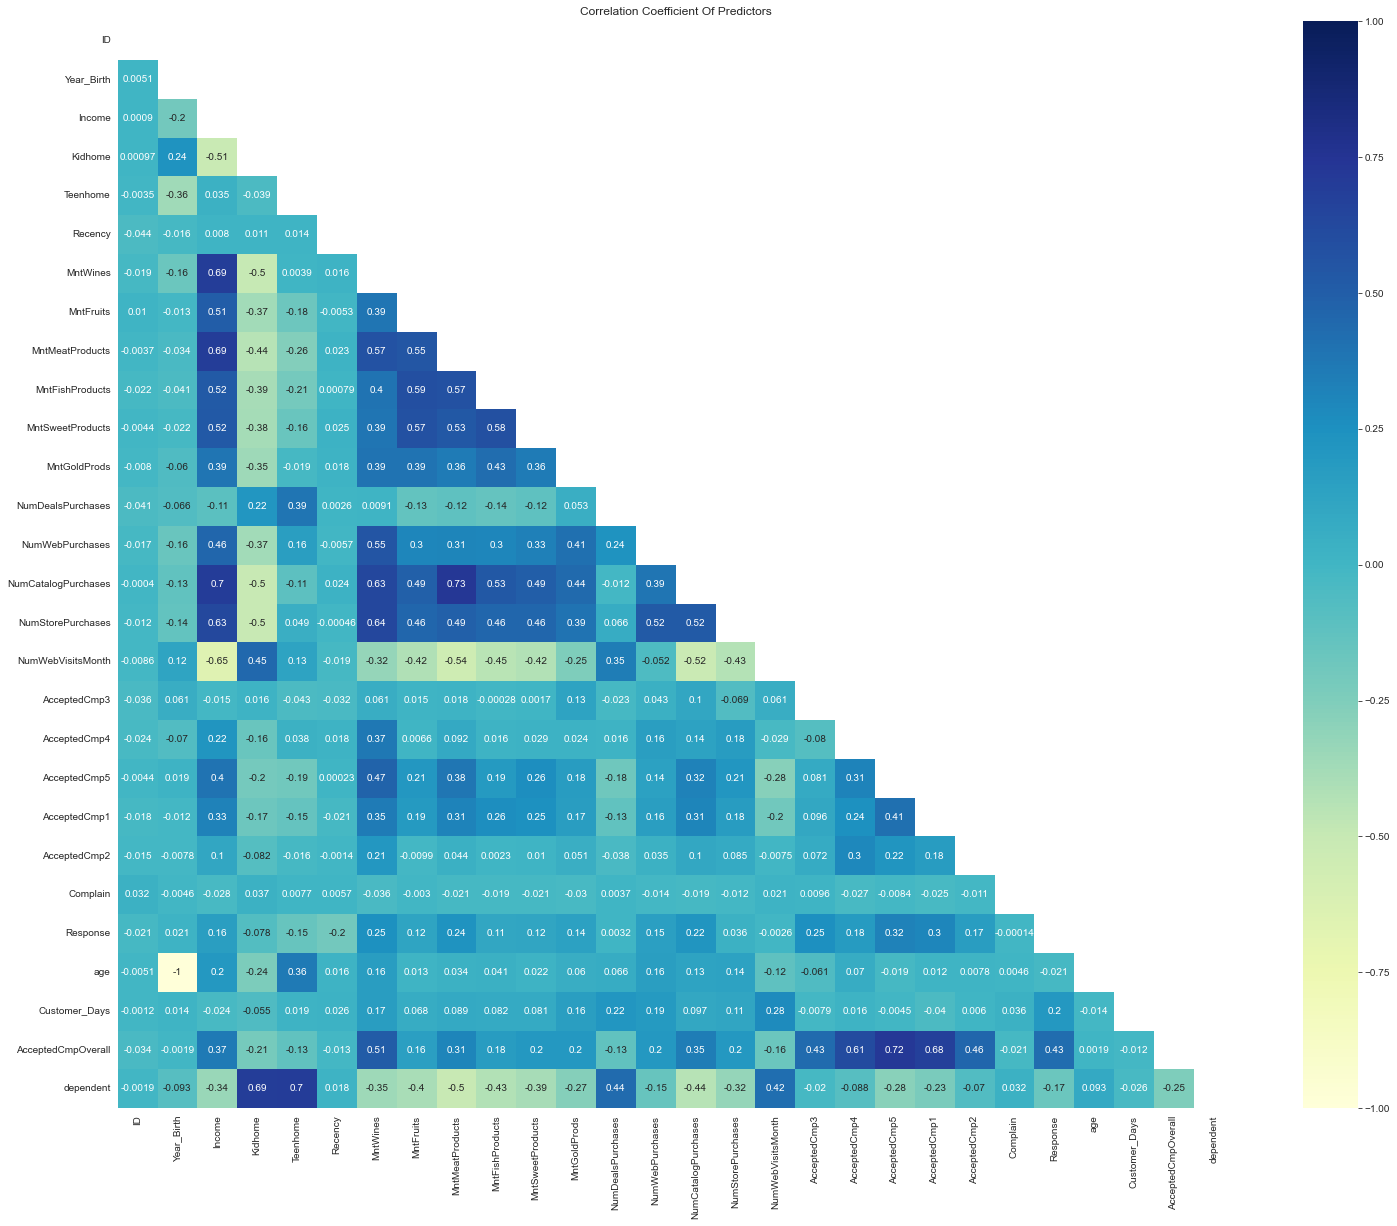

In [60]:
plt.figure(figsize=(25,20))

mask = np.triu(np.ones_like(updated_df.corr(), dtype=bool))

sns.heatmap(updated_df.corr(), mask=mask, vmin=-1, vmax=1,cmap='YlGnBu',annot=True)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

- Income is positively correlated with purchases of all types of products. Highest correlation in the wine and meat products (69%).
- Income is also positively correlated with number of purchases made through catalogue or made in store.

- Income is negatively correlated with the number of website visits per month. Lower income customers are likely to check the website. 

- Number of kids at home negatively correlated income and also negatively correlated with amount of purchases as well as number of purchases made through catalogue and store purchase. 

- Complain does not appear to have a strong correlation with any other variable. 

## 6. Modeling

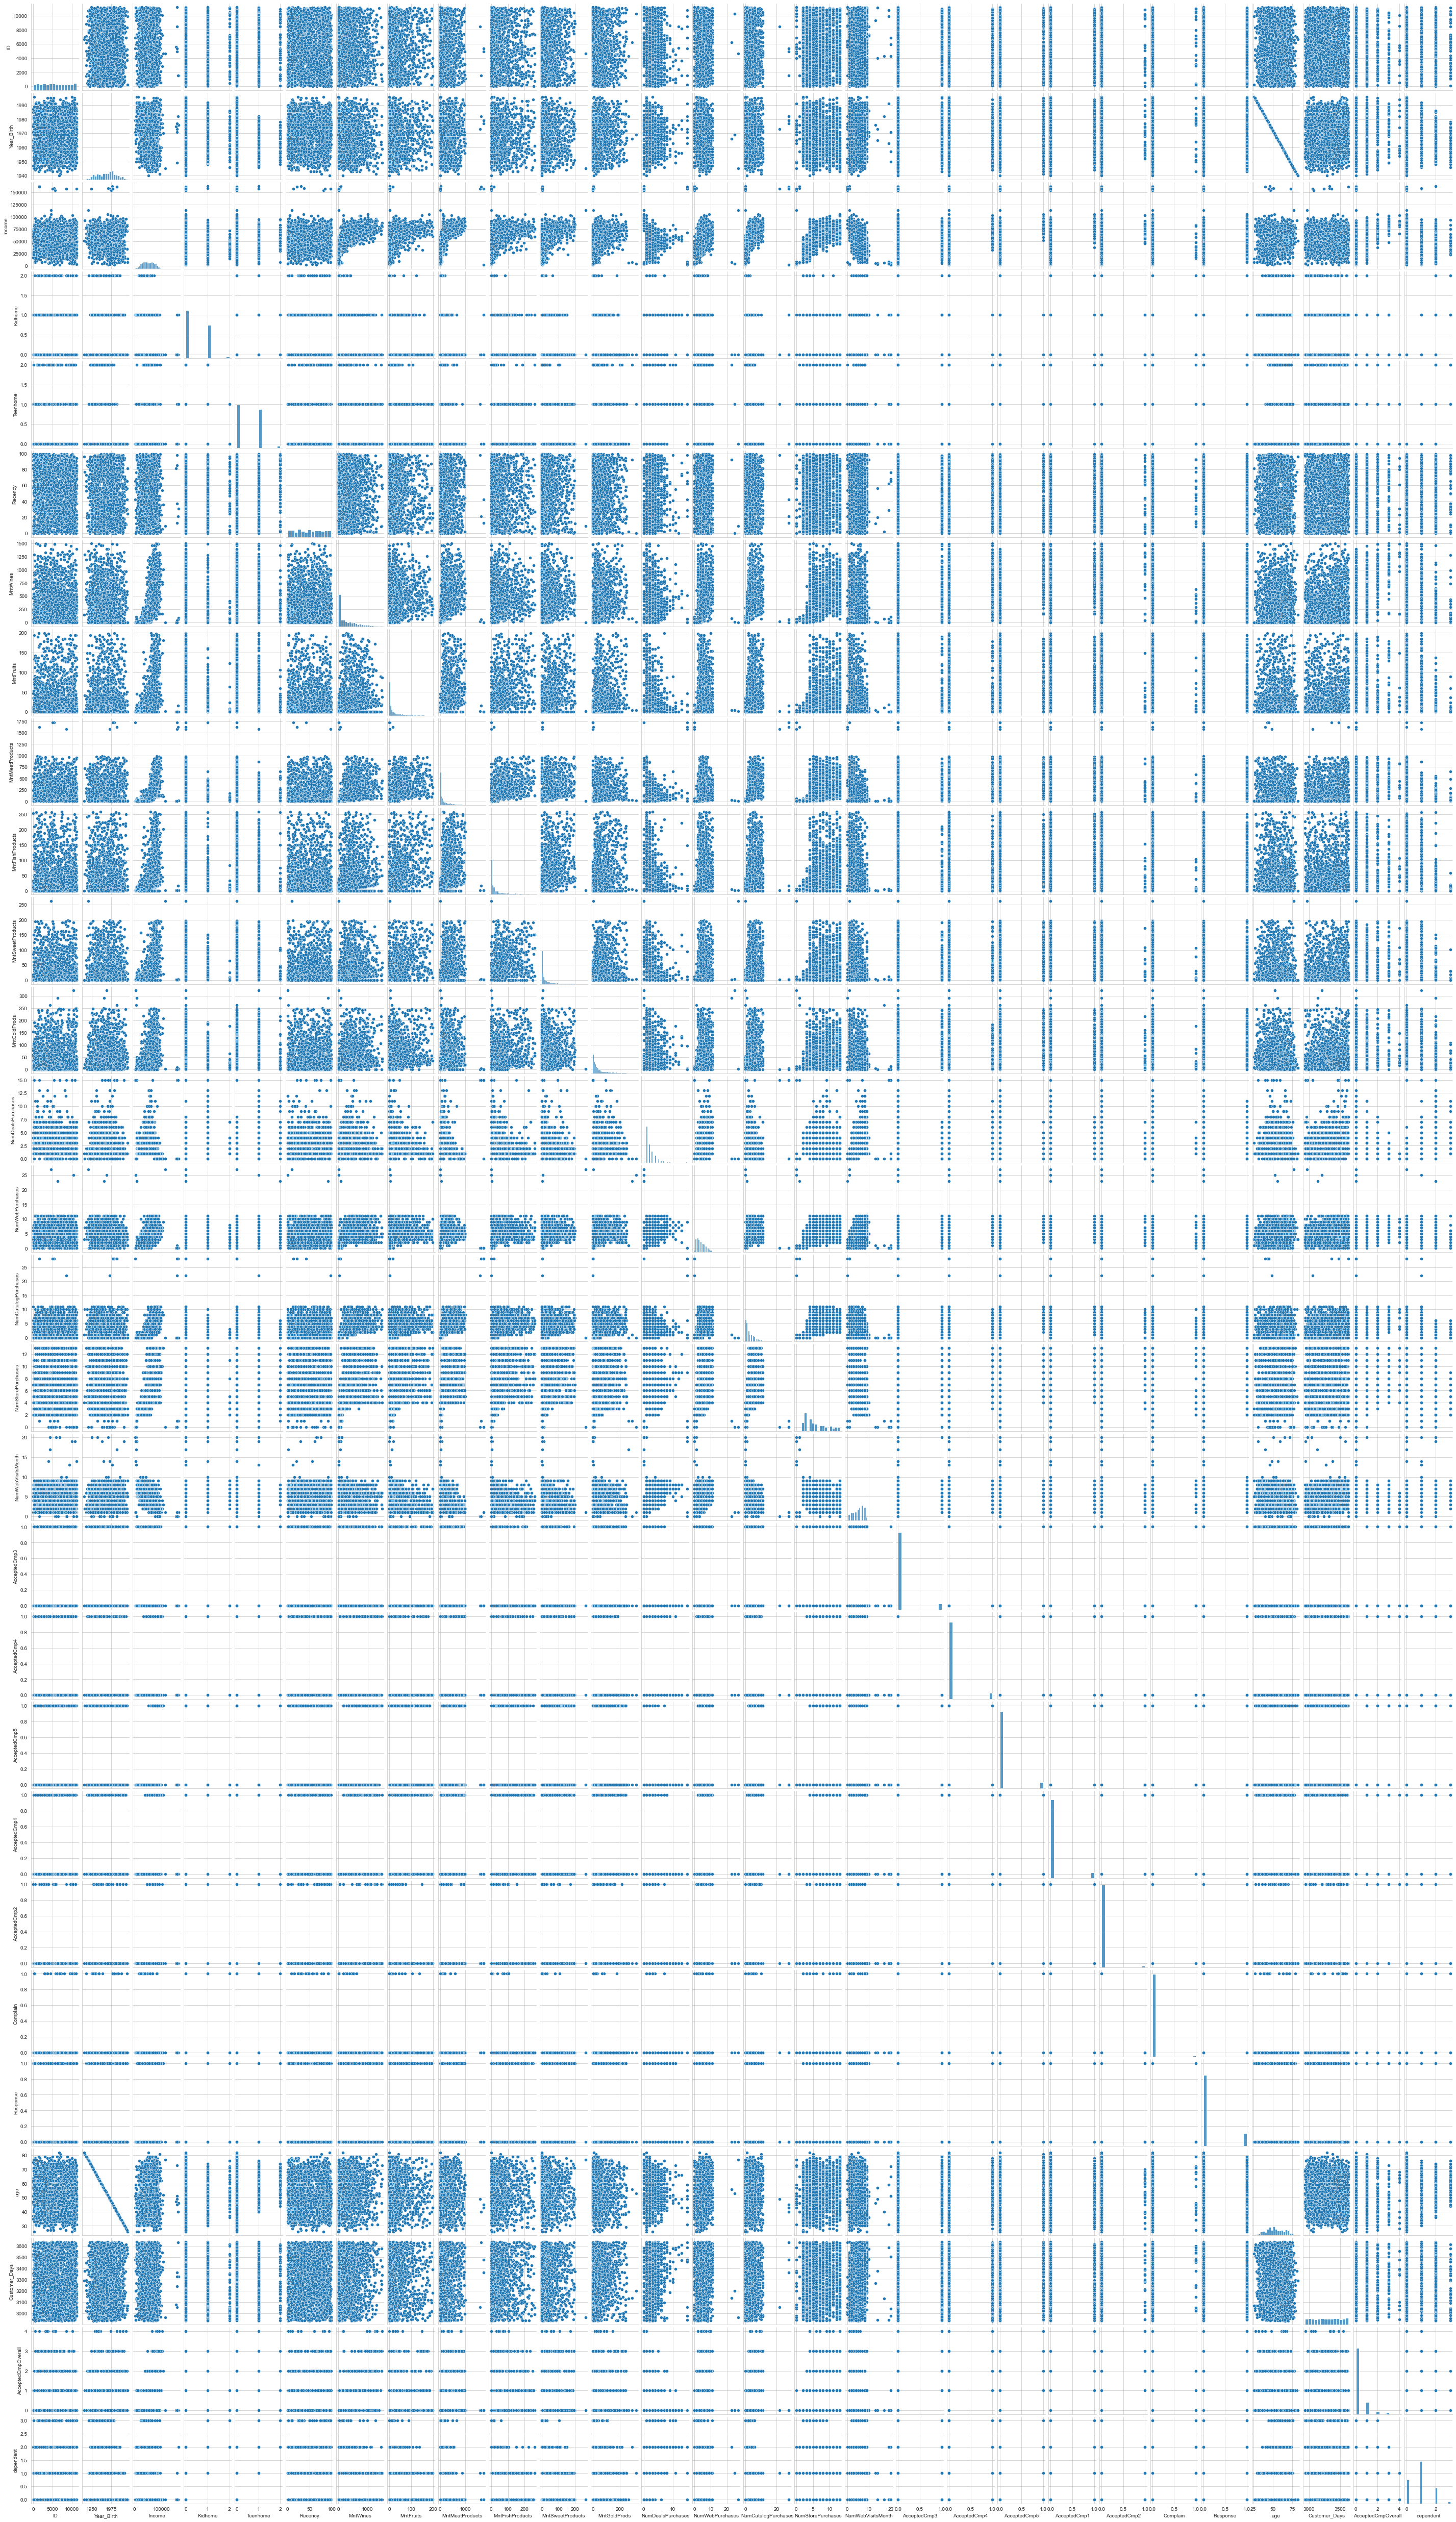

In [61]:
sns.pairplot(updated_df).fig.set_figwidth(40)
plt.show()

In [62]:
print('correlation between income and amount spent on wines:',np.corrcoef(updated_df['Income'], updated_df['MntWines'])[0][1])
print('correlation between income and amount spent on fruits:',np.corrcoef(updated_df['Income'], updated_df['MntFruits'])[0][1])
print('correlation between income and amount spent on meat:',np.corrcoef(updated_df['Income'], updated_df['MntMeatProducts'])[0][1])
print('correlation between income and amount spent on fish:',np.corrcoef(updated_df['Income'], updated_df['MntFishProducts'])[0][1])
print('correlation between income and amount spent on sweets:',np.corrcoef(updated_df['Income'], updated_df['MntSweetProducts'])[0][1])
print('correlation between income and amount spent on golds:',np.corrcoef(updated_df['Income'], updated_df['MntGoldProds'])[0][1])

correlation between income and amount spent on wines: 0.688209275178227
correlation between income and amount spent on fruits: 0.5073537927710591
correlation between income and amount spent on meat: 0.6922787846267737
correlation between income and amount spent on fish: 0.5200397709042698
correlation between income and amount spent on sweets: 0.5235985342505239
correlation between income and amount spent on golds: 0.38829935957931666


### Linear Regression model

In [63]:
import statsmodels.formula.api as smf

In [64]:
df_dummies = pd.get_dummies(updated_df[['Education','Marital_Status']])

In [65]:
bt = pd.concat([updated_df, df_dummies], axis=1)
bt.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   age  Customer_Days  AcceptedCmpOverall  dependent  Education_Basic  \
0   65           3598                   0          0                0   
1   68           3048                   0          2                0   
2   57           3247                   0          0                0   
3   38           3074                   0          1                0   
4   41           3096                   0          1                0   

   Education_Graduation  Education_Master  Education_PhD  \
0                     1                 0              0   
1                     1                 0              0   
2                     1                 0              0   
3                     1                 0              0   
4                     0                 0              1   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        0                       0                      1   
1                        0                       0                      1   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       1                      0   

   Marital_Status_Together  Marital_Status_Widow  
0                        0                     0  
1                        0                     0  
2                        1                     0  
3                        1                     0  
4                        0                     0

In [66]:
reg_model = smf.ols(data=bt, formula="Response ~ Income + dependent\
    + Recency + MntWines + MntFruits + MntMeatProducts + \
    + MntSweetProducts + MntGoldProds+ NumDealsPurchases+ NumWebPurchases+ NumCatalogPurchases\
    + NumStorePurchases+ NumWebVisitsMonth + AcceptedCmp3+ AcceptedCmp4+ AcceptedCmp5+ AcceptedCmp1\
    + AcceptedCmp2+ Complain + age+ Customer_Days + Education_Basic + Education_Graduation + Education_Master\
    + Education_PhD + Marital_Status_Divorced + Marital_Status_Married + Marital_Status_Single\
    + Marital_Status_Together + Marital_Status_Widow")
reg_result = reg_model.fit()
reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     39.77
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.68e-172
Time:                        11:16:25   Log-Likelihood:                -408.13
No. Observations:                2212   AIC:                             874.3
Df Residuals:                    2183   BIC:                             1040.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.5754      0.081     -7.094      0.000      -0.734      -0.416
Income                  -2.915e-07   6.08e-07     -0.480      0.631   -1.48e-06       9e-07
dependent                  -0.0309      0.012     -2.646      0.008      -0.054      -0.008
Recency                    -0.0024      0.000    -11.210      0.000      -0.003      -0.002
MntWines                -3.945e-05   3.49e-05     -1.129      0.259      -0.000    2.91e-05
MntFruits                   0.0003      0.000      1.466      0.143      -0.000       0.001
MntMeatProducts             0.0002   4.89e-05      4.780      0.000       0.000       0.000
MntSweetProducts           -0.0001      0.000     -0.521      0.603      -0.001       0.000
MntGoldProds                0.0001      0.000      0.720      0.472      -0.000       0.000
NumDealsPurchases           0.0105      0.004      2.485      0.013       0.002       0.019
NumWebPurchases             0.0078      0.003      2.435      0.015       0.002       0.014
NumCatalogPurchases         0.0016      0.004      0.432      0.666      -0.006       0.009
NumStorePurchases          -0.0189      0.003     -6.358      0.000      -0.025      -0.013
NumWebVisitsMonth           0.0052      0.004      1.180      0.238      -0.003       0.014
AcceptedCmp3                0.2695      0.025     10.705      0.000       0.220       0.319
AcceptedCmp4                0.1238      0.028      4.434      0.000       0.069       0.179
AcceptedCmp5                0.2650      0.030      8.714      0.000       0.205       0.325
AcceptedCmp1                0.2217      0.029      7.552      0.000       0.164       0.279
AcceptedCmp2                0.2036      0.058      3.511      0.000       0.090       0.317
Complain                    0.0219      0.066      0.332      0.740      -0.108       0.152
age                      -3.65e-05      0.001     -0.063      0.950      -0.001       0.001
Customer_Days               0.0003   3.53e-05      9.248      0.000       0.000       0.000
Education_Basic            -0.2529      0.039     -6.494      0.000      -0.329      -0.177
Education_Graduation       -0.1436      0.024     -6.103      0.000      -0.190      -0.097
Education_Master           -0.1223      0.024     -5.066      0.000      -0.170      -0.075
Education_PhD              -0.0565      0.025     -2.253      0.024      -0.106      -0.007
Marital_Status_Divorced    -0.0823      0.024     -3.446      0.001      -0.129      -0.035
Marital_Status_Married     -0.1766      0.019     -9.167      0.000      -0.214      -0.139
Marital_Status_Single      -0.0658      0.020     -3.215      0.001      -0.106      -0.026
Marital_Status_Together    -0.1793      0.020     -8.805      0.000      -0.219      -0.139
Marital_Status_Widow       -0.0714      0.034  

**This model only explains 33.8%, condition number is really high - which means multicollinearity is implied. Let's reduce number of inputs that seem not statistically significant**

I will earase 'Income', 'MntSweetProducts' ,'MntGoldProds', 'NumCatalogPurchases', 'Complain', 'age'

In [67]:
reg_model2 = smf.ols(data=bt, formula="Response ~  + dependent\
    + Recency + MntWines + MntFruits + MntMeatProducts\
    + NumDealsPurchases+ NumWebPurchases\
    + NumStorePurchases+ NumWebVisitsMonth + AcceptedCmp3+ AcceptedCmp4+ AcceptedCmp5+ AcceptedCmp1\
    + AcceptedCmp2+ Customer_Days + Education_Basic + Education_Graduation + Education_Master\
    + Education_PhD + Marital_Status_Divorced + Marital_Status_Married + Marital_Status_Single\
    + Marital_Status_Together + Marital_Status_Widow")

reg_result2 = reg_model2.fit()
reg_result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     50.67
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          3.19e-177
Time:                        11:16:25   Log-Likelihood:                -408.81
No. Observations:                2212   AIC:                             863.6
Df Residuals:                    2189   BIC:                             994.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.5901      0.075     -7.822      0.000      -0.738      -0.442
dependent                  -0.0331      0.011     -2.969      0.003      -0.055      -0.011
Recency                    -0.0024      0.000    -11.216      0.000      -0.003      -0.002
MntWines                -3.796e-05   3.27e-05     -1.163      0.245      -0.000    2.61e-05
MntFruits                   0.0003      0.000      1.481      0.139    -9.7e-05       0.001
MntMeatProducts             0.0002    4.3e-05      5.377      0.000       0.000       0.000
NumDealsPurchases           0.0113      0.004      2.758      0.006       0.003       0.019
NumWebPurchases             0.0077      0.003      2.552      0.011       0.002       0.014
NumStorePurchases          -0.0192      0.003     -6.553      0.000      -0.025      -0.013
NumWebVisitsMonth           0.0056      0.004      1.484      0.138      -0.002       0.013
AcceptedCmp3                0.2741      0.025     11.133      0.000       0.226       0.322
AcceptedCmp4                0.1216      0.028      4.396      0.000       0.067       0.176
AcceptedCmp5                0.2628      0.030      8.741      0.000       0.204       0.322
AcceptedCmp1                0.2209      0.029      7.583      0.000       0.164       0.278
AcceptedCmp2                0.2059      0.058      3.559      0.000       0.092       0.319
Customer_Days               0.0003   3.48e-05      9.452      0.000       0.000       0.000
Education_Basic            -0.2546      0.039     -6.577      0.000      -0.330      -0.179
Education_Graduation       -0.1471      0.022     -6.685      0.000      -0.190      -0.104
Education_Master           -0.1264      0.023     -5.609      0.000      -0.171      -0.082
Education_PhD              -0.0620      0.023     -2.729      0.006      -0.107      -0.017
Marital_Status_Divorced    -0.0855      0.023     -3.718      0.000      -0.131      -0.040
Marital_Status_Married     -0.1795      0.019     -9.683      0.000      -0.216      -0.143
Marital_Status_Single      -0.0684      0.020     -3.433      0.001      -0.108      -0.029
Marital_Status_Together    -0.1823      0.020     -9.326      0.000      -0.221      -0.144
Marital_Status_Widow       -0.0744      0.032     -2.308      0.021      -0.138      -0.011
==============================================================================
Omnibus:                      447.533   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              842.411
Skew:                           1.230   Prob(JB):                    1.18e-183
Kurtosis:                       4.758   Cond. No.                     1.65e+19
==============================================================================

Notes:
[1] Standard Errors assum

R squared is still very low, even though I erased some of inputs that seem to have multicolinearity, F-statistic is low. This model seems not appropriate to predict our data 

### Logistic regression

I will grab numerical columns for our model. (I excluded some of unnecessary columns like 'AcceptedCmp1' or 'MntMeatProducts' which have high correlation with other column to avoid multicolinearity)

In [68]:
class_df = bt[['Income', 'dependent','Recency', 'MntWines', 'MntFruits',
        'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
        'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmpOverall','Complain', 'age', 'Customer_Days', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow','Response']]

I will set X for every columns except last column (target column) and set y as our target response

In [69]:
X = class_df.iloc[:, :-1].values
y = class_df.iloc[:, -1].values

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [71]:
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
bt_model = linear_model.LogisticRegression()
bt_model.fit(X_train, y_train)

LogisticRegression()

In [74]:
y_pred = bt_model.predict(X_test)

In [75]:
bt_model.intercept_[0]

-2.684742368589705

In [76]:
bt_model.coef_[0][0]

0.10355080762142771

In [77]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]

In [78]:
y_test.sum()/len(y_test)

0.1489841986455982

Our actual test set shows 14% of customers accepted last campaign

In [79]:
y_pred.sum()/len(y_pred)

0.0744920993227991

While our model predicts only 7% of customers would accepted last campaign offer out of total test sets 

In [80]:
print('Train score:', bt_model.score(X_train, y_train))
print('Test socre:', bt_model.score(X_test, y_test))

Train score: 0.893159977388355
Test socre: 0.8893905191873589


Both train sets and test sets show high score 

In [81]:
print('Accuracy score is', metrics.accuracy_score(y_test, y_pred))
print('MAE is', metrics.mean_absolute_error(y_test, y_pred))

Accuracy score is 0.8893905191873589
MAE is 0.11060948081264109


Text(0.5, 384.16, 'Predicted label')

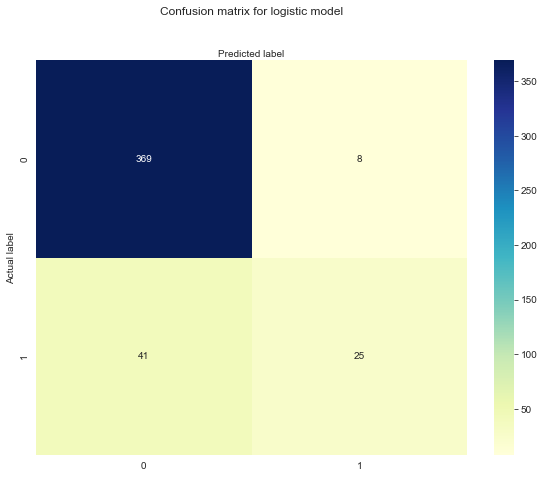

In [82]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for logistic model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Naive Bayes Classification

I will apply Gaussian Naive Bayes as our data is continuous

In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
pred_nb = nb_model.predict(X_test)

In [85]:
print('Train score:', nb_model.score(X_train, y_train))
print('Test socre:', nb_model.score(X_test, y_test))

Train score: 0.7801017524024872
Test socre: 0.7878103837471784


In [86]:
print('Accuracy score is', metrics.accuracy_score(y_test, pred_nb))
print('MAE is', metrics.mean_absolute_error(y_test, pred_nb))

Accuracy score is 0.7878103837471784
MAE is 0.21218961625282168


Text(0.5, 384.16, 'Predicted label')

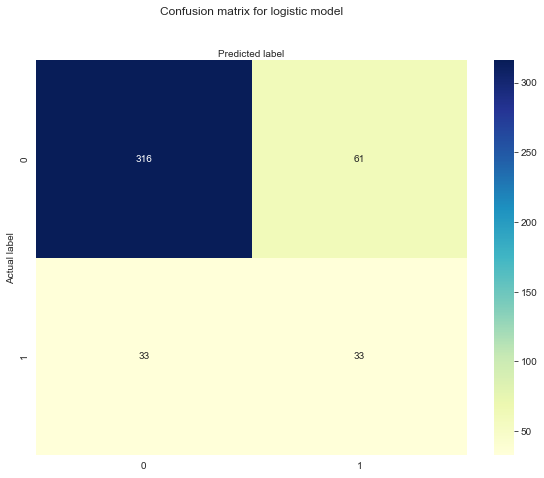

In [87]:
cnf_matrix = metrics.confusion_matrix(y_test, pred_nb)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for logistic model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Decision trees

In [88]:
from sklearn import tree

bt_tree = tree.DecisionTreeClassifier(max_depth=4, random_state =1000)
bt_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1000)

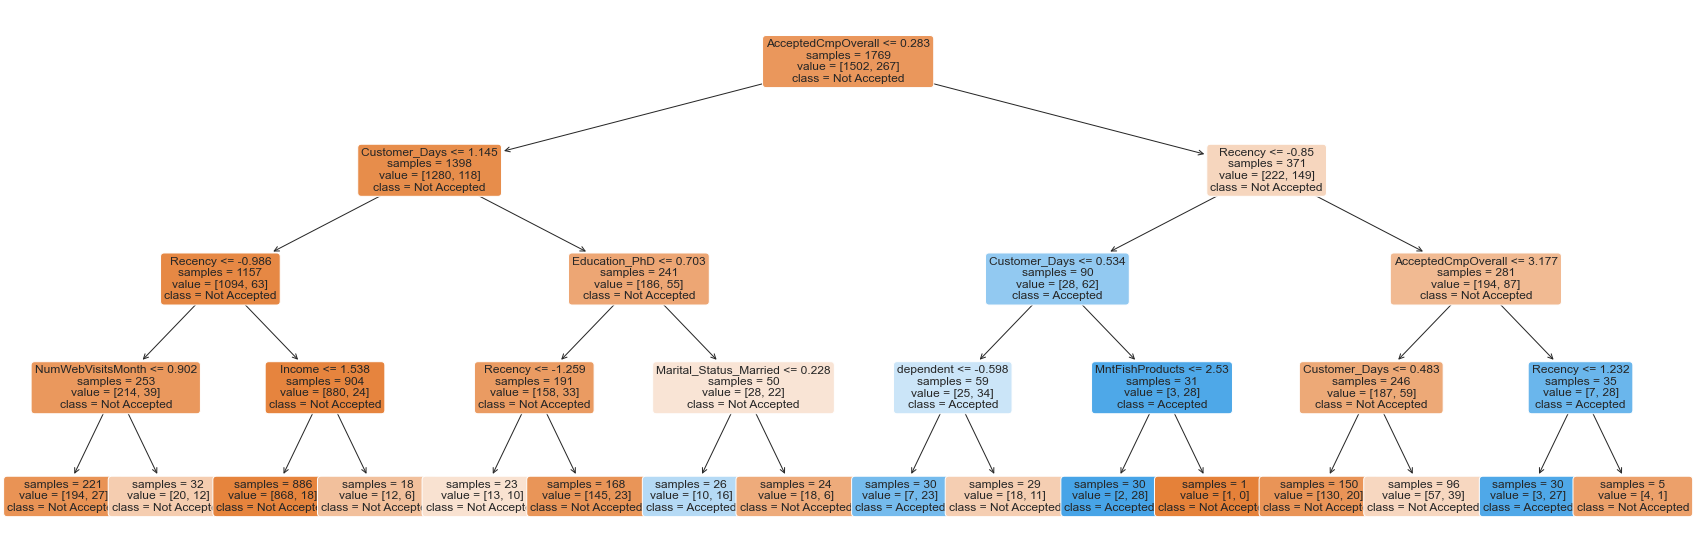

In [89]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(30, 10))

plot_tree(bt_tree,
          feature_names = class_df.columns,
          class_names = ['Not Accepted', 'Accepted'],
          rounded=True,
          impurity=False,
          filled=True,
          ax=ax,
          fontsize=12);

In [90]:
y_pred_tree = bt_tree.predict(X_test)

In [91]:
y_pred_tree.sum()/len(y_test)

0.05191873589164785

In [92]:
print('Train score:',bt_tree.score(X_train, y_train))
print('Test score:', bt_tree.score(X_test, y_test))

Train score: 0.889768230638779
Test score: 0.871331828442438


In [93]:
print('Accuracy score is', metrics.accuracy_score(y_test, y_pred_tree))
print('MAE is', metrics.mean_absolute_error(y_test, pred_nb))

Accuracy score is 0.871331828442438
MAE is 0.21218961625282168


Text(0.5, 384.16, 'Predicted label')

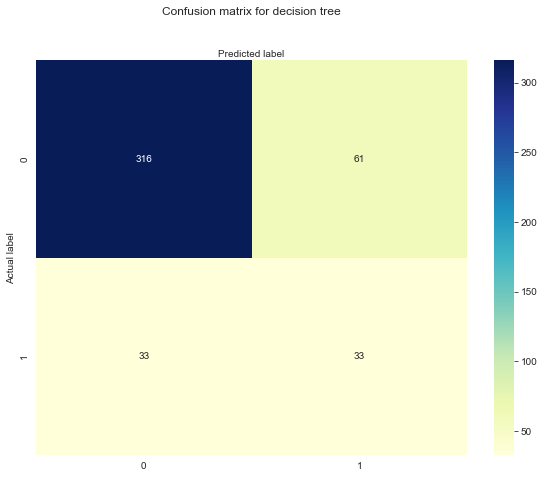

In [94]:
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred_tree)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for decision tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [95]:
depth_values = range(1, 15)


train_scores = []
test_scores = []


for d in depth_values:

    dt_tree = tree.DecisionTreeClassifier(max_depth=d)
    dt_tree.fit(X_train, y_train)

    train_acc = dt_tree.score(X_train, y_train)
    test_acc = dt_tree.score(X_test, y_test)


    train_scores.append(train_acc)
    test_scores.append(test_acc)

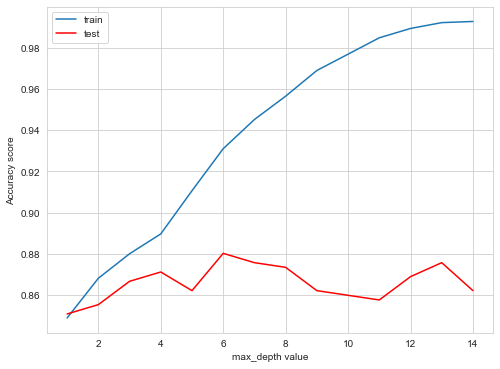

In [96]:
plt.figure()
plt.plot(depth_values, train_scores, label='train')
plt.plot(depth_values, test_scores, label='test', c='r')
plt.xlabel('max_depth value')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

Train score increase as max depth increases but the gap between train and test score drastically increase after max_depth =4, so I set the max_depth for decision tree as 4

## Conclusion

I performed 4 types of models to predict whether a customer would accept the last marketing campaign or not. 

- Linear Regression with statsmodels
- Logistic Regression
- Naive Bayes Classification
- Decision Trees

Linear regression model shows very poor predictability. Even though I removed some of variables that have multicolinearity issue, R2 does not improved while F-statistic is low. 


For the other 3 models, they have similar score and mean absolute error. Let's compare them.

In [97]:
compare_model = pd.DataFrame(np.array([[bt_model.score(X_train, y_train),
                                       bt_tree.score(X_train, y_train),
                                       nb_model.score(X_train, y_train)],
                                       [bt_model.score(X_test, y_test),
                                       bt_tree.score(X_test, y_test),
                                       nb_model.score(X_test, y_test)],
                                       [metrics.accuracy_score(y_test, y_pred),
                                       metrics.accuracy_score(y_test, pred_nb),
                                       metrics.accuracy_score(y_test, y_pred_tree)],
                                       [metrics.mean_absolute_error(y_test, y_pred),
                                       metrics.mean_absolute_error(y_test, pred_nb),
                                       metrics.mean_absolute_error(y_test, pred_nb)]]),
                             columns=['Logistic','Naive Bayes','Decision Tree'],
                             index=['Test score','Train score','Accuracy Rate','MAE'])
compare_model

Logistic  Naive Bayes  Decision Tree
Test score     0.893160     0.889768       0.780102
Train score    0.889391     0.871332       0.787810
Accuracy Rate  0.889391     0.787810       0.871332
MAE            0.110609     0.212190       0.212190

Logistic model has highest test/train score as well as accuracy rate while having lowest error terms. I would say that logistic model is performing best out of these 3 models. 

## Appendix

In [98]:
model = smf.ols(data=updated_df, formula="Income ~ MntWines + MntFruits + MntMeatProducts+ MntFishProducts+ MntSweetProducts+ MntGoldProds")
result = model.fit()

In [99]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     636.4
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:16:27   Log-Likelihood:                -24096.
No. Observations:                2212   AIC:                         4.821e+04
Df Residuals:                    2205   BIC:                         4.825e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.508e+04    409.097     85.748      0.000    3.43e+04    3.59e+04
MntWines            25.5994      1.034     24.760      0.000      23.572      27.627
MntFruits           35.5063      9.583      3.705      0.000      16.713      54.300
MntMeatProducts     31.2848      1.776     17.619      0.000      27.803      34.767
MntFishProducts     23.4187      7.184      3.260      0.001       9.331      37.506
MntSweetProducts    58.9429      9.106      6.473      0.000      41.085      76.801
MntGoldProds         9.7477      6.231      1.564      0.118      -2.472      21.968
==============================================================================
Omnibus:                      954.764   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21166.853
Skew:                           1.508   Prob(JB):                         0.00
Kurtosis:                      17.851   Cond. No.                         756.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Summary shows that independent variables (types of products) explain 63.4% of dependent vairable(income)
- F-statistic is high (636.4) 
- each P>|t| close to 0 except 'MntGoldProds' - This may need to be earased


In [100]:
model2 = smf.ols(data=updated_df, formula="Income ~ MntWines + MntFruits + MntMeatProducts+ MntFishProducts+ MntSweetProducts")
result2 = model2.fit()

In [101]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     762.7
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:16:27   Log-Likelihood:                -24097.
No. Observations:                2212   AIC:                         4.821e+04
Df Residuals:                    2206   BIC:                         4.824e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.526e+04    392.288     89.887      0.000    3.45e+04     3.6e+04
MntWines            25.9445      1.010     25.677      0.000      23.963      27.926
MntFruits           37.3510      9.514      3.926      0.000      18.694      56.008
MntMeatProducts     31.2582      1.776     17.599      0.000      27.775      34.741
MntFishProducts     25.4321      7.070      3.597      0.000      11.568      39.296
MntSweetProducts    59.7074      9.096      6.564      0.000      41.870      77.545
==============================================================================
Omnibus:                      950.345   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20815.843
Skew:                           1.502   Prob(JB):                         0.00
Kurtosis:                      17.725   Cond. No.                         722.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""